<a href="https://colab.research.google.com/github/KeremAydin98/classification-with-neural-networks/blob/main/CIFAR10_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
def data_preprocessing():
  global classes
  (X_train, y_train), (X_test, y_test) = cifar10.load_data()

  classes={
    0 : "airplane",
    1 : "automobile",
    2 : "bird",
    3 : "cat",
    4 : "deer",
    5 : "dog",
    6 : "frog",
    7 : "horse",
    8 : "ship",
    9 : "truck"}

  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')

  X_train = X_train / X_train.max()
  X_test = X_test / X_test.max()

  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)


  return X_train, y_train, X_test, y_test



In [3]:
X_train, y_train, X_test, y_test = data_preprocessing()

In [4]:
def create_CNN():

  model = Sequential()

  model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=X_train[0].shape, activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=X_train[0].shape, activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Flatten())

  model.add(Dense(256,activation='relu'))

  model.add(Dense(10, activation='softmax'))

  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


  return model



In [5]:
model = create_CNN()

In [6]:
early_stop = EarlyStopping(monitor='val_loss', mode='min',patience=5)

In [7]:
model_history = model.fit(X_train, y_train, validation_data=(X_test,y_test),callbacks=[early_stop],epochs=15)

Epoch 1/15
1563/1563 [==============================] - 67s 42ms/step - loss: 1.4768 - accuracy: 0.4684 - val_loss: 1.2370 - val_accuracy: 0.5659
Epoch 2/15
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1518 - accuracy: 0.5934 - val_loss: 1.1326 - val_accuracy: 0.6009
Epoch 3/15
1563/1563 [==============================] - 63s 41ms/step - loss: 1.0099 - accuracy: 0.6467 - val_loss: 1.0298 - val_accuracy: 0.6360
Epoch 4/15
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9019 - accuracy: 0.6853 - val_loss: 0.9827 - val_accuracy: 0.6578
Epoch 5/15
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8070 - accuracy: 0.7199 - val_loss: 1.0450 - val_accuracy: 0.6458
Epoch 6/15
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7276 - accuracy: 0.7465 - val_loss: 0.9922 - val_accuracy: 0.6686
Epoch 7/15
1563/1563 [==============================] - 63s 40ms/step - loss: 0.6555 - accuracy: 0.7711 - val_loss: 1.0216 -

In [14]:
def evaluate_model(model):

  print(str(model))
  print("\n")
  
  y_pred=model.predict(X_test)
  y_pred=np.argmax(y_pred, axis=1)
  y_test_class=np.argmax(y_test, axis=1)

  print("Classification Report: \n")
  print(classification_report(y_test_class,y_pred))

  data={"y_Actual":y_test_class,"y_Predicted":y_pred}
  df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
  confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)

  plt.figure(figsize=(10,10))
  sns.heatmap(confusion_matrix,annot=True)
  plt.show()
  print("\n")



Classification Report: 

              precision    recall  f1-score   support

           0       0.69      0.74      0.72      1000
           1       0.87      0.70      0.78      1000
           2       0.55      0.57      0.56      1000
           3       0.50      0.44      0.47      1000
           4       0.61      0.66      0.64      1000
           5       0.53      0.60      0.56      1000
           6       0.74      0.78      0.76      1000
           7       0.75      0.69      0.72      1000
           8       0.80      0.76      0.78      1000
           9       0.73      0.78      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



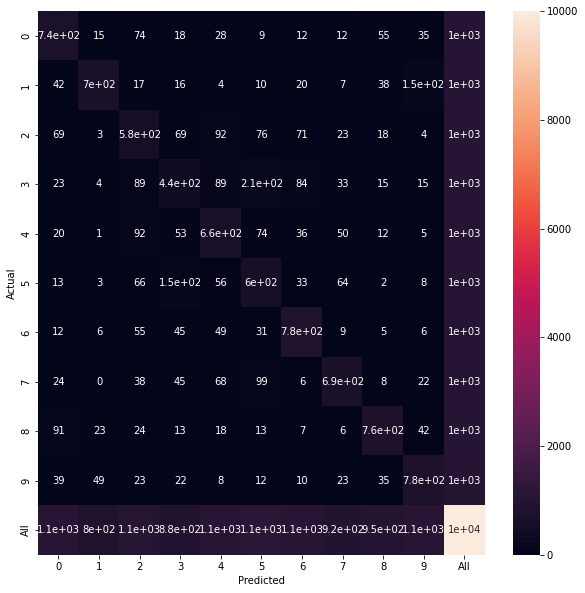

In [15]:
evaluate_model(model)

In [34]:
def compare_pred_with_actual(model):

  figure,ax=plt.subplots(1,5,figsize=(10,10))


  for i in range(5):

    random_value=np.random.randint(low=0,high=10000)
    y_pred = model.predict(X_test)
       

    y_predicted=np.argmax(y_pred[random_value], axis=0)
    y_original=np.argmax(y_test[random_value], axis=0)

    predict_class = classes[y_predicted]
    original_class = classes[y_original]

    ax[i].imshow(X_test[random_value],cmap='gray')	
    ax[i].set_title("True: %s \nPredict: %s" % (str(original_class), str(predict_class)))

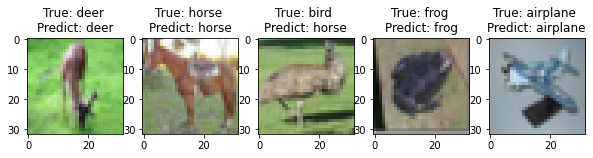

In [36]:
compare_pred_with_actual(model)

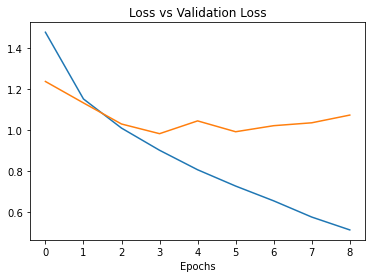

In [28]:
plt.plot(model_history.history['loss'],label='loss')
plt.plot(model_history.history['val_loss'],label='val_loss')
plt.title("Loss vs Validation Loss")
plt.xlabel("Epochs")
plt.show()

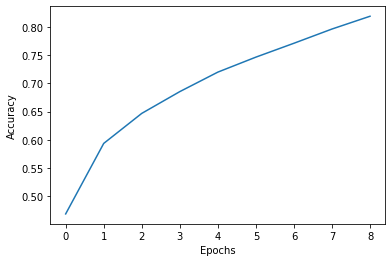

In [29]:
plt.plot(model_history.history['accuracy'],label='accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.show()